# Q2
The goal of this question is to calculate body fat using Brozek’s equation. In this problem, the first column **brozek** is the response variable, and all other columns are treated as the features (we may not use all the features, please only use the ones stated in each question). To start, read the data file fat.csv in the homework folder (containing 252 samples) and split it into two sets. Set 1 includes the first 200 rows of the data (do not count the row associated with the feature/response names), and set 2, which includes the last 52 rows of the data. Name the first set **train** and the second set **test**.

In [3]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [4]:
Fat = pd.read_csv("fat.csv")
print(Fat)

     brozek  siri  density  age  weight  height  adipos   free  neck  chest  \
0      12.6  12.3   1.0708   23  154.25   67.75    23.7  134.9  36.2   93.1   
1       6.9   6.1   1.0853   22  173.25   72.25    23.4  161.3  38.5   93.6   
2      24.6  25.3   1.0414   22  154.00   66.25    24.7  116.0  34.0   95.8   
3      10.9  10.4   1.0751   26  184.75   72.25    24.9  164.7  37.4  101.8   
4      27.8  28.7   1.0340   24  184.25   71.25    25.6  133.1  34.4   97.3   
..      ...   ...      ...  ...     ...     ...     ...    ...   ...    ...   
247    11.5  11.0   1.0736   70  134.25   67.00    21.1  118.9  34.9   89.2   
248    32.3  33.6   1.0236   72  201.00   69.75    29.1  136.1  40.9  108.5   
249    28.3  29.3   1.0328   72  186.75   66.00    30.2  133.9  38.9  111.1   
250    25.3  26.0   1.0399   72  190.75   70.50    27.0  142.6  38.9  108.3   
251    30.7  31.9   1.0271   74  207.50   70.00    29.8  143.7  40.8  112.4   

     abdom    hip  thigh  knee  ankle  biceps  fore

In [5]:
train,test = np.split(Fat,[int(200)])
print(train)
print('============================================================================')
print(test)
print('============================================================================')
y = train['brozek']
print(y)

     brozek  siri  density  age  weight  height  adipos   free  neck  chest  \
0      12.6  12.3   1.0708   23  154.25   67.75    23.7  134.9  36.2   93.1   
1       6.9   6.1   1.0853   22  173.25   72.25    23.4  161.3  38.5   93.6   
2      24.6  25.3   1.0414   22  154.00   66.25    24.7  116.0  34.0   95.8   
3      10.9  10.4   1.0751   26  184.75   72.25    24.9  164.7  37.4  101.8   
4      27.8  28.7   1.0340   24  184.25   71.25    25.6  133.1  34.4   97.3   
..      ...   ...      ...  ...     ...     ...     ...    ...   ...    ...   
195    24.8  25.5   1.0411   42  180.00   68.25    27.2  135.4  38.5  101.6   
196    21.5  22.0   1.0488   42  156.25   69.00    23.1  122.6  35.5   97.8   
197    17.6  17.7   1.0583   42  168.00   71.50    23.1  138.4  36.5   92.0   
198     7.3   6.6   1.0841   42  167.25   72.75    22.3  155.1  37.6   94.0   
199    22.6  23.6   1.0462   43  170.75   67.50    26.4  132.1  37.4  103.7   

     abdom    hip  thigh  knee  ankle  biceps  fore

In [32]:
X = pd.DataFrame({'intercept': np.ones(train.shape[0]),
                  'siri':    train['siri'],
                  'density': train['density'],
                  'age':     train['age'],
                  'weight':  train['weight'],
                  'height':  train['height'],
                  'adipos':  train['adipos'],
                  'free':    train['free'],
                  'neck':    train['neck'],
                  'chest':   train['chest'],
                  'abdom':   train['abdom'],
                  'hip':     train['hip'],
                  'thigh':   train['thigh'],
                  'knee':    train['knee'],
                  'ankle':   train['ankle'],
                  'biceps':  train['biceps'],
                  'forearm': train['forearm'],
                  'wrist':   train['wrist']})
print(X)

     intercept  siri  density  age  weight  height  adipos   free  neck  \
0          1.0  12.3   1.0708   23  154.25   67.75    23.7  134.9  36.2   
1          1.0   6.1   1.0853   22  173.25   72.25    23.4  161.3  38.5   
2          1.0  25.3   1.0414   22  154.00   66.25    24.7  116.0  34.0   
3          1.0  10.4   1.0751   26  184.75   72.25    24.9  164.7  37.4   
4          1.0  28.7   1.0340   24  184.25   71.25    25.6  133.1  34.4   
..         ...   ...      ...  ...     ...     ...     ...    ...   ...   
195        1.0  25.5   1.0411   42  180.00   68.25    27.2  135.4  38.5   
196        1.0  22.0   1.0488   42  156.25   69.00    23.1  122.6  35.5   
197        1.0  17.7   1.0583   42  168.00   71.50    23.1  138.4  36.5   
198        1.0   6.6   1.0841   42  167.25   72.75    22.3  155.1  37.6   
199        1.0  23.6   1.0462   43  170.75   67.50    26.4  132.1  37.4   

     chest  abdom    hip  thigh  knee  ankle  biceps  forearm  wrist  
0     93.1   85.2   94.5   5

We can use a more systematics and feneral way of generating the data matrix X:
- ModelSpec() (renamed MS() in the preamble) creates a transform object, and then a pair of methods transform() and fit() are used to construct a corresponding model matrix.
- The fit() method takes the original array and may do some initial computations on it, as specified in the transform object. For example, it may compute means and standard deviations for centering and scaling. The transform() method applies the fitted transformation to the array of data, and produces the model matrix.

In [30]:
design = MS(['siri', 'density', 'age', 'weight', 'height', 'adipos', 'free', 'neck','chest',
             'abdom','hip','thigh', 'knee', 'ankle', 'biceps', 'forearm', 'wrist']
           ).fit_transform(train)
print('============================================================================')
print(X)

     siri  density  age  weight  height  adipos   free  neck  chest  abdom  \
200  12.2   1.0709   43  178.25   70.25    25.4  155.9  37.8  102.7   89.2   
201  22.1   1.0484   43  150.00   69.25    22.0  117.5  35.2   91.1   85.7   
202  28.7   1.0340   43  200.50   71.50    27.6  144.9  37.9  107.2  103.1   
203   6.0   1.0854   44  184.00   74.00    23.7  171.4  37.9  100.8   89.1   
204  34.8   1.0209   44  223.00   69.75    32.3  148.5  40.9  121.6  113.9   
205  16.6   1.0610   44  208.75   73.00    27.6  174.2  41.9  105.6   96.3   
206  32.9   1.0250   44  166.00   65.50    27.2  113.5  39.1  100.6   93.9   
207  32.8   1.0254   47  195.00   72.50    26.1  133.6  40.2  102.7  101.3   
208   9.6   1.0771   47  160.50   70.25    22.9  144.3  36.0   99.8   83.9   
209  10.8   1.0742   47  159.75   70.75    22.5  141.8  34.5   92.9   84.4   
210   7.1   1.0829   49  140.50   68.00    21.4  129.5  35.8   91.2   79.4   
211  27.2   1.0373   49  216.25   74.50    27.4  159.3  40.2  11

Now we fit a simple linear regression model<br>
Note that **`sm.OLS()`** does not fit the model; it specifies the model, and then **`model.fit()`** does the actual fitting.

In [33]:
model = sm.OLS(y, X)
fittedModel = model.fit()
# summarize(fittedModel)
# You can view a more comprehensive version of the results via
fittedModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.859e+04
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          7.25e-285
Time:                        15:57:02   Log-Likelihood:                 61.275
No. Observations:                 200   AIC:                            -86.55
Df Residuals:                     182   BIC:                            -27.18
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.7984      4.641      2.542      0.012       2.641      20.956
siri           0.8845      0.013     66.439      0.000       0.858       0.911
density       -9.5175      4.172     -2.281      0.024     -17.750      -1.285
age           -0.0007      0.002     -0.417      0.677      -0.004       0.003
weight         0.0116      0.005      2.429      0.016       0.002       0.021
height         0.0004      0.005      0.075      0.940      -0.009       0.010
adipos        -0.0213      0.016     -1.361      0.175      -0.052       0.010
free          -0.0134      0.006     -2.324      0.021      -0.025      -0.002
neck          -0.0037      0.011     -0.325      0.746      -0.026       0.019
chest          0.0034      0.005      0.631      0.529      -0.007       0.014
abdom          0.0005      0.005      0.090      0.929      -0.010       0.011
hip           -0.0037      0.007     -0.496      0.620      -0.018       0.011
thigh          0.0199      0.008      2.579      0.011       0.005       0.035
knee          -0.0305      0.013     -2.386      0.018      -0.056      -0.005
ankle          0.0037      0.010      0.359      0.720      -0.017       0.024
biceps        -0.0159      0.009     -1.871      0.063      -0.033       0.001
forearm        0.0196      0.010      1.891      0.060      -0.001       0.040
wrist          0.0340      0.027      1.246      0.214      -0.020       0.088
==============================================================================
Omnibus:                      146.785   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8218.452
Skew:                           2.048   Prob(JB):                         0.00
Kurtosis:                      34.136   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (a) What is the R-squared value, and based on that how good do you see the model fitting the training data?


### (b) Based on α = 0.05 and the calculated p-values, 10 features seem problematic.
| feature | p-value |
| --- | --- |
| age | 0.677 |
| height | 0.940 |
| adipos | 0.175 |
| neck | 0.746 |
| chest | 0.529 |
| abdom | 0.929 |
| hip | 0.620 |
| ankle | 0.720 |
| biceps | 0.063 |
| wrist | 0.214 |


### (c) Calculate the prediction error using your test file.

In [35]:
X_test = pd.DataFrame({'intercept': np.ones(test.shape[0]),
                  'siri':    test['siri'],
                  'density': test['density'],
                  'age':     test['age'],
                  'weight':  test['weight'],
                  'height':  test['height'],
                  'adipos':  test['adipos'],
                  'free':    test['free'],
                  'neck':    test['neck'],
                  'chest':   test['chest'],
                  'abdom':   test['abdom'],
                  'hip':     test['hip'],
                  'thigh':   test['thigh'],
                  'knee':    test['knee'],
                  'ankle':   test['ankle'],
                  'biceps':  test['biceps'],
                  'forearm': test['forearm'],
                  'wrist':   test['wrist']})
print(X_test)

     intercept  siri  density  age  weight  height  adipos   free  neck  \
200        1.0  12.2   1.0709   43  178.25   70.25    25.4  155.9  37.8   
201        1.0  22.1   1.0484   43  150.00   69.25    22.0  117.5  35.2   
202        1.0  28.7   1.0340   43  200.50   71.50    27.6  144.9  37.9   
203        1.0   6.0   1.0854   44  184.00   74.00    23.7  171.4  37.9   
204        1.0  34.8   1.0209   44  223.00   69.75    32.3  148.5  40.9   
205        1.0  16.6   1.0610   44  208.75   73.00    27.6  174.2  41.9   
206        1.0  32.9   1.0250   44  166.00   65.50    27.2  113.5  39.1   
207        1.0  32.8   1.0254   47  195.00   72.50    26.1  133.6  40.2   
208        1.0   9.6   1.0771   47  160.50   70.25    22.9  144.3  36.0   
209        1.0  10.8   1.0742   47  159.75   70.75    22.5  141.8  34.5   
210        1.0   7.1   1.0829   49  140.50   68.00    21.4  129.5  35.8   
211        1.0  27.2   1.0373   49  216.25   74.50    27.4  159.3  40.2   
212        1.0  19.5   1.

In [37]:
# the actual value from test dataset
y_actual = test['brozek'].values
print(y_actual)

# the value predicted by the trained model
y_predict = fittedModel.predict(X_test)
print(y_predict)


[12.5 21.7 27.7  6.8 33.4 16.6 31.7 31.5 10.1 11.3  7.8 26.4 19.3 18.5
 19.3 45.1 13.8  8.2 23.9 15.1 12.7 25.3 11.9  6.1 11.3 12.8 14.9 24.5
 15.  16.9 11.1 16.1 15.5 25.9 25.5 18.4 24.  26.4 12.7 28.8 17.  33.6
 29.3 31.4 28.1 15.3 29.1 11.5 32.3 28.3 25.3 30.7]
200    12.491956
201    21.666287
202    28.000290
203     6.750676
204    33.444082
205    16.406405
206    31.580560
207    31.589029
208    10.054932
209    11.160034
210     7.783435
211    26.449591
212    19.247554
213    18.453091
214    19.274744
215    45.207942
216    13.732245
217     8.100412
218    23.948369
219    15.025196
220    12.480838
221    25.264071
222    11.792685
223     6.035693
224    11.288001
225    12.754803
226    14.840383
227    24.533041
228    15.003107
229    16.874781
230    10.961338
231    16.131614
232    15.434466
233    25.899383
234    25.079098
235    18.342245
236    24.123096
237    26.393575
238    12.762198
239    28.808770
240    16.905497
241    33.520351
242    29.350331
243 

In [58]:
y_actual = np.array(y_actual)
y_predict = np.array(y_predict)
# RSS = sum(np.square((y_actual - y_predict)))

RSS = sum(np.square(y_actual - y_predict))
print(RSS)
e1 = np.sqrt(RSS)
print(e1)

0.5681275600864975
0.753742369836337


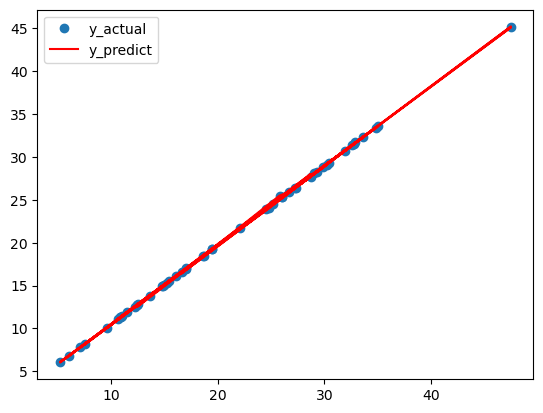

In [41]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# ax.plot(test['siri'], y_actual, "o", label="y_actual")
# ax.plot(np.hstack((test['siri'], X_test['siri'])), np.hstack((y_actual, y_predict)), "r", label="y_predict")
# ax.legend(loc="best")